In [1]:
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

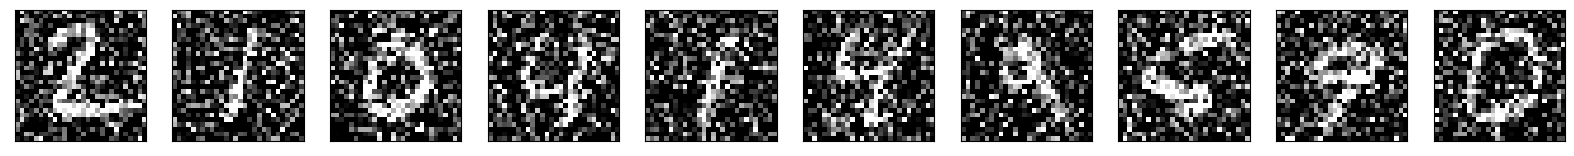

In [2]:
np.random.seed(1337)

#-- Cargar sólo las imágenes sin las etiquetas ---
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

##-- Visualizando las imágenes ruidosas --
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [3]:

##--- definición del modelo --
input_img = layers.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# En este punto la representación es de (7, 7, 32)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
print(autoencoder.summary()) 

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          9248  

In [4]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Entrenando elautoencoder
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/100
469/469 [==============================] - 42s 87ms/step - loss: 0.1753 - val_loss: 0.1202
Epoch 2/100
469/469 [==============================] - 41s 88ms/step - loss: 0.1156 - val_loss: 0.1104
Epoch 3/100
469/469 [==============================] - 40s 86ms/step - loss: 0.1093 - val_loss: 0.1058
Epoch 4/100
469/469 [==============================] - 39s 83ms/step - loss: 0.1058 - val_loss: 0.1036
Epoch 5/100
469/469 [==============================] - 39s 84ms/step - loss: 0.1038 - val_loss: 0.1021
Epoch 6/100
469/469 [==============================] - 40s 84ms/step - loss: 0.1022 - val_loss: 0.1006
Epoch 7/100
469/469 [==============================] - 46s 98ms/step - loss: 0.1011 - val_loss: 0.0996
Epoch 8/100
469/469 [==============================] - 40s 85ms/step - loss: 0.1003 - val_loss: 0.0991
Epoch 9/100
469/469 [==============================] - 39s 82ms/step - loss: 0.0996 - val_loss: 0.0984
Epoch 10/100
469/469 [==============================] - 46s 98ms/step - l

469/469 [==============================] - 36s 77ms/step - loss: 0.0933 - val_loss: 0.0932
Epoch 80/100
469/469 [==============================] - 37s 79ms/step - loss: 0.0933 - val_loss: 0.0933
Epoch 81/100
469/469 [==============================] - 36s 77ms/step - loss: 0.0933 - val_loss: 0.0933
Epoch 82/100
469/469 [==============================] - 37s 78ms/step - loss: 0.0933 - val_loss: 0.0932
Epoch 83/100
469/469 [==============================] - 37s 79ms/step - loss: 0.0933 - val_loss: 0.0936
Epoch 84/100
469/469 [==============================] - 38s 80ms/step - loss: 0.0933 - val_loss: 0.0932
Epoch 85/100
469/469 [==============================] - 37s 78ms/step - loss: 0.0933 - val_loss: 0.0933
Epoch 86/100
469/469 [==============================] - 38s 80ms/step - loss: 0.0933 - val_loss: 0.0934
Epoch 87/100
469/469 [==============================] - 38s 80ms/step - loss: 0.0933 - val_loss: 0.0933
Epoch 88/100
469/469 [==============================] - 36s 77ms/step - loss:

In [5]:

# Predicción del Autoencoder para las imágenes de testeo
decoded_imgs = autoencoder.predict(x_test_noisy)

313/313 [==============================] - 2s 5ms/step


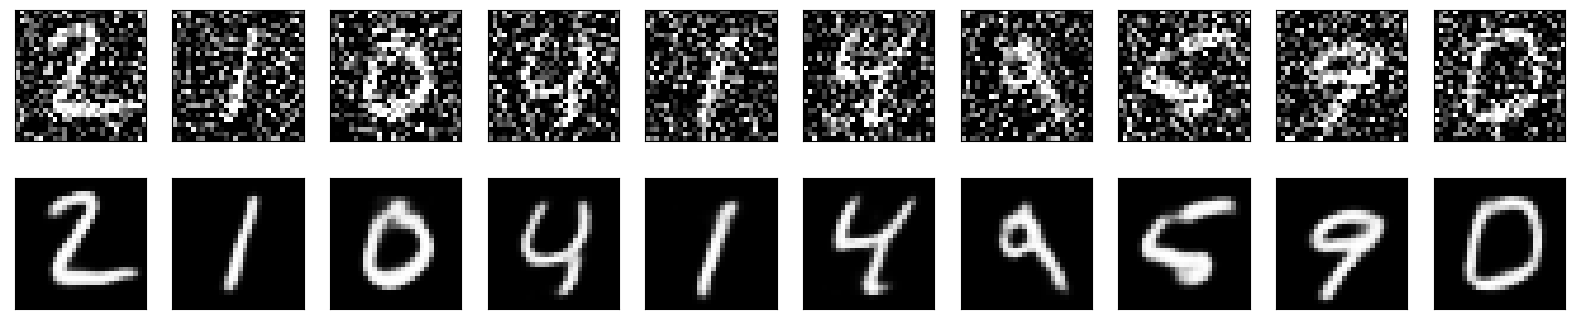

In [6]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruccion
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
